In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(8, 8)})

https://en.wikipedia.org/wiki/Monte_Carlo_method

For example, consider a quadrant (circular sector) inscribed in a unit square. Given that the ratio of their areas is π/4, the value of π can be approximated using a Monte Carlo method:
1. Draw a square, then inscribe a quadrant within it
2. Uniformly scatter a given number of points over the square
3. Count the number of points inside the quadrant, i.e. having a distance from the origin of less than 1
4. The ratio of the inside-count and the total-sample-count is an estimate of the ratio of the two areas, π/4. Multiply the result by 4 to estimate π.

#### Estimate the pi

Instead of 1/4 of a circle, let's do a full circle

In [9]:
def dist(a : np.ndarray, origin : np.ndarray) -> np.float64:
    """To calculate the distance of point a to the origin
    """
    return np.sqrt(np.sum((origin - a)**2))

# origin = np.array([0, 0])
# a = np.array([-1, 1])
# dist(origin=origin, a=a)

In [10]:
def generate_points(lower=-1, upper=1, n_samples=5000) -> list:
    """ Generate samples within a domain
    """
    x = np.random.uniform(low=lower, high=upper, size=n_samples)
    y = np.random.uniform(low=lower, high=upper, size=n_samples)
    return [x, y]

# list_a = generate_a()
# list_a[:5]

The estimated value of pi is 3.148



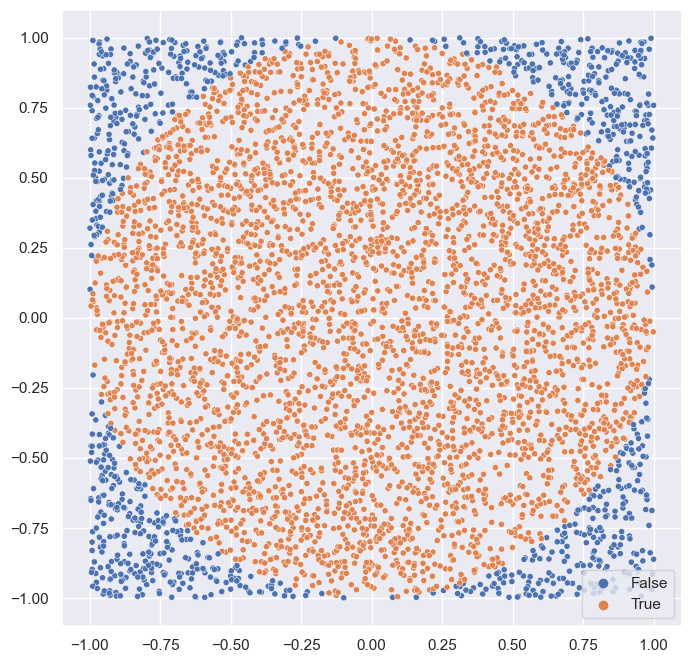

In [11]:
def simulate(**kwargs):
    """Generate points and calculate whether or not it's in the unit distance to the origin
    """
    points = np.vstack(generate_points(**kwargs)).T
    dists = np.apply_along_axis(func1d=dist, axis=1, arr=points, origin=np.array([0, 0]))
    is_within = dists <= 1
    est = 4 * (sum(is_within) / len(is_within))

    print(f"The estimated value of pi is {est}")
    print("")
    sns.scatterplot(x=points[:, 0], y=points[:, 1], hue=is_within, s=20);

simulate(n_samples=5000)

#### Use Monte Carlo Simulation to assess claim risk in health insurance

Approach based on: https://www.lexjansen.com/wuss/1997/WUSS97040.pdf

Claims = Access * ALOS * Rate where\
Access represents the probablity of making a claim\
ALOS means the Average Length of Stay\
Rate means the daily rate of staying in a hospital

In [87]:
def plot_distributions(dist, **kwargs):

    if 'bins' in kwargs:
        bins = kwargs.pop('bins')

    dist_name = dist.__name__
    param_values = zip(*kwargs.values())
    param_names = list(kwargs.keys())
    
    fig, axes = plt.subplots(
        nrows= 2,
        ncols= 2,
        figsize=(7, 7),
        constrained_layout=True,
        sharex=True,
        sharey=True
    )

    fig.suptitle(dist_name, fontsize=18)

    for i, v in enumerate(param_values):
        ax = axes.ravel()[i]

        param_pairs = dict(zip(param_names, v))
        param_pairs_list = [f"{k} = {v}" for k, v in param_pairs.items()]
        param_str = ' '.join(param_pairs_list)
        ax.set_title(param_str)  

        rv = dist(*v)
        
        if isinstance(rv[0], np.float64):
            sns.histplot(rv, ax=ax, bins=bins)
        else:
            sns.histplot(rv, ax=ax, stat='density', discrete=True)

# plot_distributions(dist=np.random.poisson, lam=[0.35, 0.5, 1, 2], size=np.repeat(2000, 4))

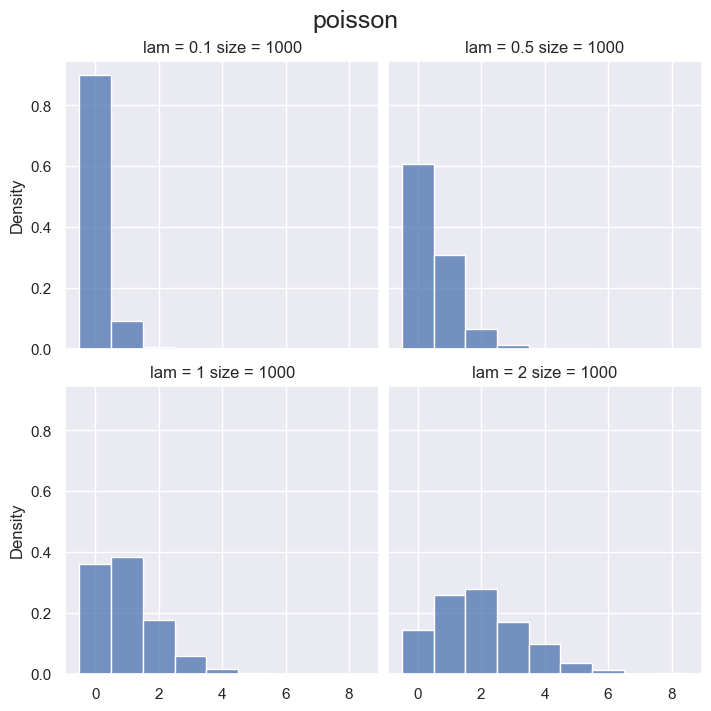

In [123]:
plot_distributions(dist=np.random.poisson, lam=[0.1, 0.5, 1, 2], size=np.repeat(1000, 4))

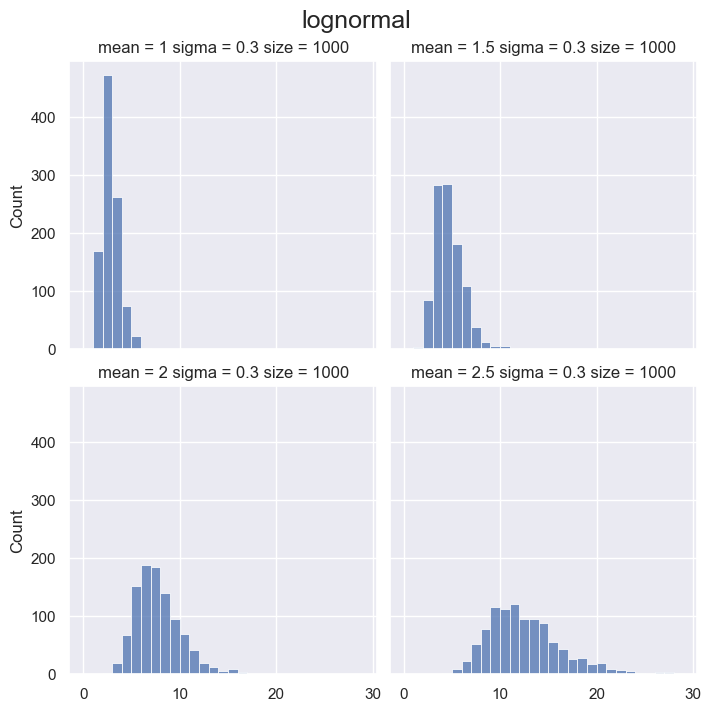

In [89]:
plot_distributions(dist=np.random.lognormal, mean = [1, 1.5, 2, 2.5], sigma=[0.3, 0.3, 0.3, 0.3], size=np.repeat(1000, 4), bins=np.arange(0, 30))

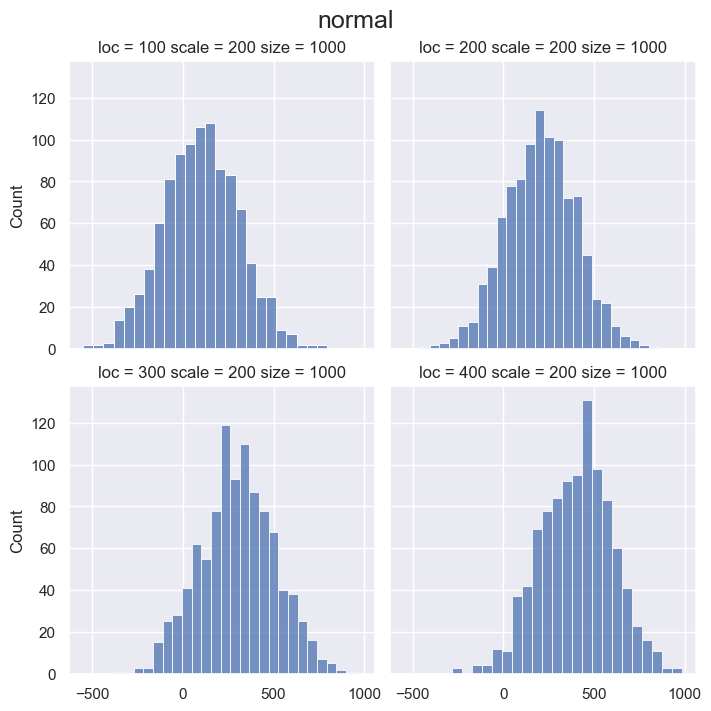

In [99]:
plot_distributions(dist=np.random.normal, loc=[100, 200, 300, 400], scale=[200, 200, 200, 200], size=np.repeat(1000, 4), bins = 'auto')

In [128]:
def simulate_total_claims(access : np.random, 
                          ALOS : np.random,
                          rate : np.random,
                          size : int = 1000,
                          **kwargs) -> list:
    
    accesses = access(kwargs['lam'], size=size)
    simulations = list()

    for i in range(len(accesses)):
        # print(accesses)
        simulation = dict()
        n_access = accesses[i]
        simulation['id'] = i
        simulation['n_access'] = n_access
        LOS = ALOS(kwargs['mean'], kwargs['sigma'], size=n_access)

        if n_access != 0:
            LOS = np.where(LOS < 1, 1, LOS)
            rates = rate(kwargs['loc'], kwargs['scale'], size=n_access)
            rates = np.where(rates < 0, 1, rates)

            total_LOS = np.sum(LOS)
            total_cost = np.sum(LOS * rates)

            simulation['total_LOS'] = total_LOS
            simulation['total_cost'] = total_cost
        else:
            simulation['total_LOS'] = 0
            simulation['total_cost'] = 0    

        simulations.append(simulation)        

    return simulations


In [129]:
sim = simulate_total_claims(access=np.random.poisson, 
                            ALOS=np.random.lognormal, 
                            rate=np.random.normal,
                            size=10000,
                            lam = 0.1, 
                            loc=400, 
                            scale = 200, 
                            mean = 2.5, 
                            sigma = 0.3)

total_claims = sum([e['total_cost'] for e in sim])
avg_claim = total_claims / 10000
print(avg_claim)

532.0679399732803
